In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc # 한글넣기
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

df = pd.read_csv('./서울시 무더위쉼터.csv', encoding='cp949')
df

,시설번호,년도,지역코드,시설유형,쉼터명칭,도로명주소,지번상세주소,면적,이용가능인원,선풍기보유대수,...,입력시간,수정시간,사용여부,비고,운영시작일,운영종료일,경도,위도,X좌표,Y좌표
0,1120000293,2022,1120064500,13,옥수나들목 샘물창고,서울특별시 성동구 동호로 21 (옥수동),168-1,3,8,0.0,...,2022-07-27 14:45:55,2022-07-27 14:45:55,Y,NaN,NaN,NaN,127.017200,37.539900,201520.107996,548932.664564
1,1129000257,2022,1129057500,1,동선동 희망경로당,서울특별시 성북구 아리랑로4길 49-1,71-1,101,42,3.0,...,2021-07-28 11:21:52,2022-06-30 10:23:44,Y,NaN,20220520.0,20220930.0,127.018283,37.595875,201614.630757,555145.220399
2,1121500101,2022,1121577000,11,긴고랑공원,NaN,68-19,633,15,0.0,...,2021-05-21 16:50:03,2022-07-12 15:19:14,Y,NaN,NaN,NaN,127.090956,37.558969,208036.452235,551052.854595
3,1121500105,2022,1121583000,11,금모래공원,서울특별시 광진구 뚝섬로56길 28,651-50,1022,15,0.0,...,2021-05-21 17:00:13,2022-07-12 15:20:07,Y,NaN,NaN,NaN,127.082398,37.530181,207283.129192,547856.970880
4,1120000292,2022,1120010700,12,무지개텃밭 샘물창고,NaN,67-10,3,5,0.0,...,2022-07-27 14:44:13,2022-07-27 14:44:13,Y,NaN,NaN,NaN,127.040700,37.553600,203596.341571,550453.838547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4090,1156000150,2022,1156065000,1,우성1차아파트 경로당,서울특별시 영등포구 도신로 68,365-0,174,50,2.0,...,2021-05-17 14:42:46,2022-05-19 07:42:28,Y,NaN,20220520.0,20220930.0,126.899790,37.505763,191139.601434,545148.408411
4091,1156000152,2022,1156065000,1,건영아파트경로당,서울특별시 영등포구 도림로 313,368-0,59,25,2.0,...,2021-05-17 14:42:46,2022-05-19 16:40:09,Y,NaN,20220520.0,20220930.0,126.901045,37.504310,191250.379651,544987.048840
4092,11215012,2022,1121573000,2,광진노인종합복지관,서울특별시 광진구 군자로 88,364-15,3515,500,10.0,...,2021-03-18 13:48:31,2022-05-19 14:54:34,Y,NaN,20220520.0,20220930.0,127.071497,37.551075,206317.845696,550175.217709
4093,11215070,2022,1121584000,2,자양종합사회복지관,서울특별시 광진구 자양번영로 35,581-2,184,46,1.0,...,2021-03-18 13:48:31,2022-05-19 14:54:34,Y,NaN,20220520.0,20220930.0,127.075196,37.532894,206646.322282,548157.602579


In [2]:
# 서울시 무더위쉼터 정보 컬럼
df.columns

Index(['시설번호', '년도', '지역코드', '시설유형', '쉼터명칭', '도로명주소', '지번상세주소', '면적', '이용가능인원',
       '선풍기보유대수', '에어컨보유대수', '야간개방', '휴일개방', '숙박가능여부', '입력시간', '수정시간', '사용여부',
       '비고', '운영시작일', '운영종료일', '경도', '위도', 'X좌표', 'Y좌표'],
      dtype='object')

In [3]:
df1 = df[['시설번호','지역코드','도로명주소','이용가능인원','위도','경도']]
df1

,시설번호,지역코드,도로명주소,이용가능인원,위도,경도
0,1120000293,1120064500,서울특별시 성동구 동호로 21 (옥수동),8,37.539900,127.017200
1,1129000257,1129057500,서울특별시 성북구 아리랑로4길 49-1,42,37.595875,127.018283
2,1121500101,1121577000,NaN,15,37.558969,127.090956
3,1121500105,1121583000,서울특별시 광진구 뚝섬로56길 28,15,37.530181,127.082398
4,1120000292,1120010700,NaN,5,37.553600,127.040700
...,...,...,...,...,...,...
4090,1156000150,1156065000,서울특별시 영등포구 도신로 68,50,37.505763,126.899790
4091,1156000152,1156065000,서울특별시 영등포구 도림로 313,25,37.504310,126.901045
4092,11215012,1121573000,서울특별시 광진구 군자로 88,500,37.551075,127.071497
4093,11215070,1121584000,서울특별시 광진구 자양번영로 35,46,37.532894,127.075196


In [4]:
df2 = df1.dropna()  # 결측치 제거
df2

,시설번호,지역코드,도로명주소,이용가능인원,위도,경도
0,1120000293,1120064500,서울특별시 성동구 동호로 21 (옥수동),8,37.539900,127.017200
1,1129000257,1129057500,서울특별시 성북구 아리랑로4길 49-1,42,37.595875,127.018283
3,1121500105,1121583000,서울특별시 광진구 뚝섬로56길 28,15,37.530181,127.082398
6,1121500106,1121584000,서울특별시 광진구 자양번영로3길 16,15,37.531990,127.074347
8,11590079,1159058000,서울특별시 동작구 서달로 91 (흑석동),80,37.502233,126.958566
...,...,...,...,...,...,...
4090,1156000150,1156065000,서울특별시 영등포구 도신로 68,50,37.505763,126.899790
4091,1156000152,1156065000,서울특별시 영등포구 도림로 313,25,37.504310,126.901045
4092,11215012,1121573000,서울특별시 광진구 군자로 88,500,37.551075,127.071497
4093,11215070,1121584000,서울특별시 광진구 자양번영로 35,46,37.532894,127.075196


In [5]:
df2.isnull().sum() # 결측치 확인

시설번호      0
지역코드      0
도로명주소     0
이용가능인원    0
위도        0
경도        0
dtype: int64

In [6]:
df2

,시설번호,지역코드,도로명주소,이용가능인원,위도,경도
0,1120000293,1120064500,서울특별시 성동구 동호로 21 (옥수동),8,37.539900,127.017200
1,1129000257,1129057500,서울특별시 성북구 아리랑로4길 49-1,42,37.595875,127.018283
3,1121500105,1121583000,서울특별시 광진구 뚝섬로56길 28,15,37.530181,127.082398
6,1121500106,1121584000,서울특별시 광진구 자양번영로3길 16,15,37.531990,127.074347
8,11590079,1159058000,서울특별시 동작구 서달로 91 (흑석동),80,37.502233,126.958566
...,...,...,...,...,...,...
4090,1156000150,1156065000,서울특별시 영등포구 도신로 68,50,37.505763,126.899790
4091,1156000152,1156065000,서울특별시 영등포구 도림로 313,25,37.504310,126.901045
4092,11215012,1121573000,서울특별시 광진구 군자로 88,500,37.551075,127.071497
4093,11215070,1121584000,서울특별시 광진구 자양번영로 35,46,37.532894,127.075196


In [7]:
import re
import warnings
warnings.filterwarnings('ignore')
df2['도로명주소'] = df2['도로명주소'].str.extract(r'(\w+구)') # 정규표현식 사용하여 지역 구룹화
df2

,시설번호,지역코드,도로명주소,이용가능인원,위도,경도
0,1120000293,1120064500,성동구,8,37.539900,127.017200
1,1129000257,1129057500,성북구,42,37.595875,127.018283
3,1121500105,1121583000,광진구,15,37.530181,127.082398
6,1121500106,1121584000,광진구,15,37.531990,127.074347
8,11590079,1159058000,동작구,80,37.502233,126.958566
...,...,...,...,...,...,...
4090,1156000150,1156065000,영등포구,50,37.505763,126.899790
4091,1156000152,1156065000,영등포구,25,37.504310,126.901045
4092,11215012,1121573000,광진구,500,37.551075,127.071497
4093,11215070,1121584000,광진구,46,37.532894,127.075196


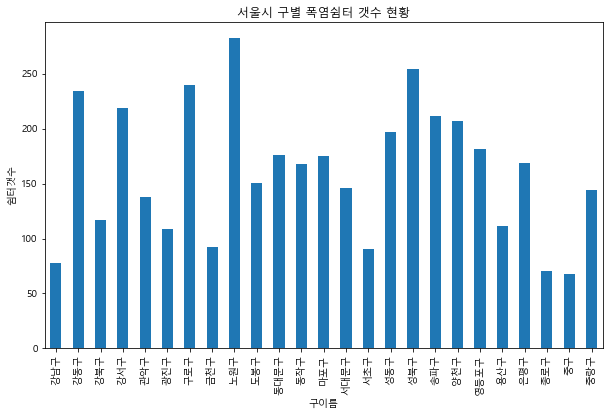

In [9]:
# 지역별 폭염쉼터 갯수 확인을 위한 전처리 및 시각화
df3=df2[['시설번호','도로명주소','이용가능인원']]
df4 = df3.value_counts('도로명주소')
df4 = df4.sort_index() # 이름순으로 정렬

df4.plot(kind='bar',figsize=(10,6))
plt.title("서울시 구별 폭염쉼터 갯수 현황")
plt.xlabel("구이름")
plt.ylabel("쉼터갯수")
plt.show()

In [79]:
df2.set_index('도로명주소', inplace = True)  # 도로명주소 인덱스로

In [89]:
df2

,시설번호,지역코드,이용가능인원,위도,경도
도로명주소,,,,,
성동구,1120000293,1120064500,8,37.539900,127.017200
성북구,1129000257,1129057500,42,37.595875,127.018283
광진구,1121500105,1121583000,15,37.530181,127.082398
광진구,1121500106,1121584000,15,37.531990,127.074347
동작구,11590079,1159058000,80,37.502233,126.958566
...,...,...,...,...,...
영등포구,1156000150,1156065000,50,37.505763,126.899790
영등포구,1156000152,1156065000,25,37.504310,126.901045
광진구,11215012,1121573000,500,37.551075,127.071497


In [84]:
gu = df2.groupby('도로명주소')
list(gu)

[('강남구',
               시설번호        지역코드  이용가능인원         위도          경도
  도로명주소                                                       
  강남구    1168000099  1168056500       7  37.519266  127.047838
  강남구      11680019  1168054500      10  37.526595  127.037474
  강남구      11680012  1168054000      30  37.530618  127.030651
  강남구      11680014  1168054000      20  37.525176  127.044256
  강남구      11680016  1168054000      30  37.509863  127.051901
  ...           ...         ...     ...        ...         ...
  강남구      11680056  1168067000      30  37.484087  127.077966
  강남구      11680030  1168060000      35  37.502833  127.062011
  강남구      11680027  1168060000      30  37.493156  127.062999
  강남구    1168000103  1168066000      20  37.484546  127.054616
  강남구      11680049  1168065600      25  37.489931  127.050699
  
  [78 rows x 5 columns]),
 ('강동구',
             시설번호        지역코드  이용가능인원         위도          경도
  도로명주소                                                     
  강동구    117

In [10]:
!pip install xlrd

In [11]:
filename = 'Report.xls'
# populdf = pd.read_xls('자료/Report.xls')
df5 = pd.read_excel('Report.xls')
df5 = df5[['자치구','인구','인구.1','인구.2','65세이상고령자']]
df5 = df5.set_index('자치구')

df5=df5.rename(columns=df5.iloc[1])
df5.drop([df5.index[0]],inplace=True)
df5.drop([df5.index[0]],inplace=True)
df5.drop([df5.index[0]],inplace=True)
df5=df5.sort_values('자치구')
df5.head()

,계,남자,여자,65세이상고령자
자치구,,,,
강남구,537338,257096,280242,79575
강동구,465097,227891,237206,75477
강북구,300824,145934,154890,64961
강서구,578426,277797,300629,93924
관악구,500336,250450,249886,80686


Text(0, 0.5, '인구(명)')

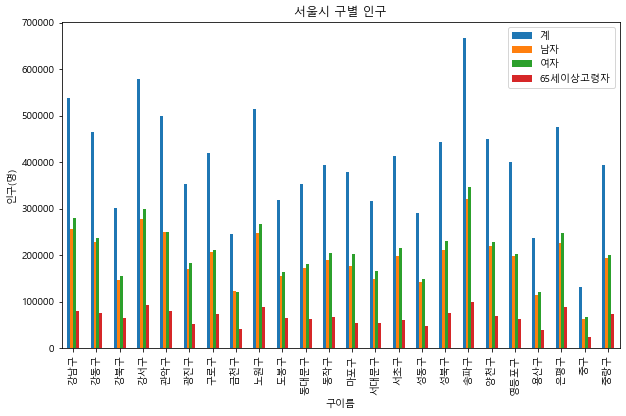

In [12]:
df5.plot(kind='bar',figsize=(10,6))
plt.title("서울시 구별 인구")
plt.xlabel("구이름")
plt.ylabel("인구(명)")

In [13]:
import pandas as pd
df6=pd.concat(df5['계'],df4)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "Series"